# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import requests
import os  
import json
import tweepy
import re

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
tweeter_archive=pd.read_csv('twitter-archive-enhanced.csv')

tweeter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
folder_name='image_prediction'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response=requests.get(url)

In [4]:
with open (os.path.join(folder_name,
                      url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)

In [5]:
image_pre=pd.read_csv('image_prediction/image-predictions.tsv', sep='\t')

image_pre.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [11]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = tweeter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)



1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [6]:
selected_attr = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        selected_attr.append({'tweet_id': json_data['id'],
                             'favorites': json_data['favorite_count'],
                             'retweets': json_data['retweet_count'],
                             'timestamp': json_data['created_at']})
tweet_selected_attr = pd.DataFrame(selected_attr, columns=['tweet_id','favorites','retweets','timestamp'])


tweet_selected_attr.tail(10)

,tweet_id,favorites,retweets,timestamp
2317,666058600524156928,102,49,Mon Nov 16 01:01:59 +0000 2015
2318,666057090499244032,257,114,Mon Nov 16 00:55:59 +0000 2015
2319,666055525042405380,385,204,Mon Nov 16 00:49:46 +0000 2015
2320,666051853826850816,1058,728,Mon Nov 16 00:35:11 +0000 2015
2321,666050758794694657,118,51,Mon Nov 16 00:30:50 +0000 2015
2322,666049248165822465,92,37,Mon Nov 16 00:24:50 +0000 2015
2323,666044226329800704,253,118,Mon Nov 16 00:04:52 +0000 2015
2324,666033412701032449,103,37,Sun Nov 15 23:21:54 +0000 2015
2325,666029285002620928,116,40,Sun Nov 15 23:05:30 +0000 2015
2326,666020888022790149,2317,435,Sun Nov 15 22:32:08 +0000 2015


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [7]:
tweeter_archive.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1547,689280876073582592,NaN,NaN,2016-01-19 02:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Herald. He wants you to know he could ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689280876...,10,10,Herald,None,None,None,None
738,780800785462489090,NaN,NaN,2016-09-27 16:06:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He has a weird relationship with...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/780800785...,11,10,Koda,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1124,730211855403241472,NaN,NaN,2016-05-11 01:44:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ziva. She doesn't know how her collar ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/730211855...,11,10,Ziva,None,None,None,None
1061,741303864243200000,NaN,NaN,2016-06-10 16:19:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Theodore. He just saw an adult wearing...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741303864...,12,10,Theodore,None,None,None,None
1040,744223424764059648,NaN,NaN,2016-06-18 17:41:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is actually a pupper and I'd pet it so we...,NaN,NaN,NaN,https://twitter.com/strange_animals/status/672...,12,10,actually,None,None,pupper,None
1783,677673981332312066,NaN,NaN,2015-12-18 02:17:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Endangered triangular pup here. Could be a wiz...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677673981...,9,10,None,None,None,None,None
1671,682393905736888321,NaN,NaN,2015-12-31 02:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kreg. He's riding an invisible jet ski...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682393905...,11,10,Kreg,None,None,None,None
67,879376492567855104,NaN,NaN,2017-06-26 16:31:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jack AKA Stephen Furry. You're not sco...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879376492...,12,10,Jack,None,None,None,None
1154,725458796924002305,NaN,NaN,2016-04-27 22:57:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Pup had to be removed cuz it wouldn't have bee...,NaN,NaN,NaN,https://twitter.com/foxdeportes/status/7251360...,13,10,None,None,None,None,None


In [8]:
tweeter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
tweeter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
tweeter_archive['rating_numerator'].value_counts().sort_index()[:15]

0       2
1       9
2       9
3      19
4      17
5      37
6      32
7      55
8     102
9     158
10    461
11    464
12    558
13    351
14     54
Name: rating_numerator, dtype: int64

In [11]:
tweeter_archive['rating_denominator'].value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [12]:
tweeter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [13]:
tweeter_archive['name'].value_counts().head(30)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
Sadie        8
the          8
Daisy        7
Buddy        7
Toby         7
an           7
Bailey       7
Leo          6
Oscar        6
Stanley      6
Rusty        6
Bella        6
Dave         6
Jack         6
Koda         6
Scout        6
Jax          6
Milo         6
Louis        5
Name: name, dtype: int64

In [14]:
sum(tweeter_archive['expanded_urls'].duplicated())

137

## Quality issues

### tweeter_archive_enhance

1. Clean rows and columns that we will not need (retweets)

2. expanded_urls has 59 missing rows 

2. tweet_id change from int64 to objects because they are not numeric and aren't intended to perform calculations.

3. timestamp change from object(str) to datetime64 

4. text columns need to split and  be more readable 

5. invalid values for rating_denominator which min value is 0 

6. The names for dogs are actually not the name such as a, not,the, such, an,O,one, this, just,his, getting, by , life, quite, my.

7. multiple_stages for dog columns doggo, floofer,pupper, puppo
 
8. invalid values for rating_denominator which max value is 1776 and rating_numerator max 170 (not solved here)

### image_pre dataframe

7. tweet_id change from int64 to objects because they are not numeric and aren't intended to perform calculations.




### tweet_selected_attr

8. tweet_id change from int64 to objects because they are not numeric and aren't intended to perform calculations.
9. timestamp change from object(str) to datetime64 

## Tidiness issues
### tweeter_archive_enhance

1. source column needs to be categorized  
2. Dog stages columns need to be one  and categorized 
3. Some cloumns will be dropped 
4. Join tables 


In [15]:
image_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
image_pre.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
image_pre[image_pre['jpg_url'].duplicated(keep=False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
85,667509364010450944,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True
224,670319130621435904,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
241,670444955656130560,https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg,1,English_springer,0.403698,True,Brittany_spaniel,0.347609,True,Welsh_springer_spaniel,0.137186,True
327,671896809300709376,https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg,1,chow,0.243529,True,hamster,0.227150,False,Pomeranian,0.056057,True
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1970,868880397819494401,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True


In [18]:
sum(image_pre['tweet_id'].duplicated())

0

In [19]:
tweet_selected_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2327 non-null   int64 
 1   favorites  2327 non-null   int64 
 2   retweets   2327 non-null   int64 
 3   timestamp  2327 non-null   object
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


In [20]:
tweet_selected_attr.describe()

,tweet_id,favorites,retweets
count,2.327000e+03,2327.000000,2327.000000
mean,7.418681e+17,7205.425011,2533.750752
std,6.823284e+16,11192.023652,4289.674050
min,6.660209e+17,0.000000,1.000000
25%,6.782670e+17,1250.000000,511.500000
50%,7.182346e+17,3118.000000,1179.000000
75%,7.986692e+17,8795.500000,2930.000000
max,8.924206e+17,147971.000000,72603.000000


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [21]:
# Make copies of original pieces of data

twitter_archive_clean=tweeter_archive.copy()
image_predictions_clean= image_pre.copy()
tweet_data_clean =tweet_selected_attr.copy()

### 1. Define: Clean rows and columns that we will not need (retweets)
 
I will start with dropping retweet id and any tweet replied to as the notes above. 

we only want original dog ratings. So we need to remove retweets (text column starts with RT @) as a user can retweet their on tweet. Removing JUST the retweet-related columns like retweeted_status_id is not going to remove retweets. so we need to remove all rows that have values (not blank or non-null) in retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns

#### Code:

In [22]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_user_id'].isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_timestamp'].isnull()]

In [23]:
twitter_archive_clean=twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                              'retweeted_status_user_id','retweeted_status_timestamp'],
                                             axis=1)

#### Test

In [24]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


### 2. Define:  Drop expanded_urls because we have image url in tweet_selected_attr

#### Code:

In [25]:
twitter_archive_clean=twitter_archive_clean.drop('expanded_urls',axis=1)

#### TEST:

In [26]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   doggo               2175 non-null   object
 8   floofer             2175 non-null   object
 9   pupper              2175 non-null   object
 10  puppo               2175 non-null   object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


###  3. Define: Change tweet_id dtype column to str because we will not do any calculations on it

#### Code:

In [27]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)

#### TEST:

In [28]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   object
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   doggo               2175 non-null   object
 8   floofer             2175 non-null   object
 9   pupper              2175 non-null   object
 10  puppo               2175 non-null   object
dtypes: int64(2), object(9)
memory usage: 203.9+ KB


### 4. Define:  Change timestamp column to timestamp dtype 

#### Code:

In [29]:
twitter_archive_clean['timestamp']=pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test

In [30]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                2175 non-null   object             
 7   doggo               2175 non-null   object             
 8   floofer             2175 non-null   object             
 9   pupper              2175 non-null   object             
 10  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 203.9+ KB


### 5. Define:  text column need to split and be more readable, we will try to split https link from the whole text

#### Code:

In [31]:
twitter_archive_clean['text']=twitter_archive_clean['text'].str.rsplit(n=1, expand=True)[0]

#### TEST:

In [32]:
twitter_archive_clean['text'][5]

"Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek"

### 6. Zeros rating_denominator, the zero denominator can cause problems for our analysis. So we will drop the row

#### Code

In [33]:
twitter_archive_clean[twitter_archive_clean['rating_denominator'] == 0]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,2017-02-24 21:54:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0,None,None,None,None,None


In [34]:
pd.set_option('display.max_colwidth',-1)

twitter_archive_clean[twitter_archive_clean['rating_denominator'] == 0]['text']

/var/folders/wh/h0fw0pyn673cjtsp794stpx40000gn/T/ipykernel_83125/2393881551.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth',-1)


313    @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is
Name: text, dtype: object

In [35]:
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean['rating_denominator'] == 0].index,inplace=True)

#### TEST:

In [36]:
twitter_archive_clean[twitter_archive_clean['rating_denominator'] == 0]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


###  7. Define :  The names in tweeter_archive_enhance_drop dataframe for dogs are actually not the actual name for dogs such as a, not,the, such, an,O,one, this, just,his, getting, by , life, quite, my

#### Code:

In [37]:
mask = twitter_archive_clean['name'].str.islower() 
column_name = 'name' 
twitter_archive_clean.loc[mask, column_name] = np.nan

#### Test:

In [38]:
twitter_archive_clean['name'].value_counts()

None          679
Lucy          11 
Charlie       11 
Cooper        10 
Oliver        10 
              .. 
Shelby        1  
Sephie        1  
Bonaparte     1  
Wishes        1  
Christoper    1  
Name: name, Length: 931, dtype: int64

### 8.  tweet_id change from int64 to objects because they are not numeric and aren't intended to perform calculations.

#### Code:

In [39]:
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)

### 9. tweet_id change from int64 to objects because they are not numeric and aren't intended to perform calculations.

In [40]:
tweet_data_clean['tweet_id'] = tweet_data_clean['tweet_id'].astype(str)

#### Test:

In [41]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [42]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2327 non-null   object
 1   favorites  2327 non-null   int64 
 2   retweets   2327 non-null   int64 
 3   timestamp  2327 non-null   object
dtypes: int64(2), object(2)
memory usage: 72.8+ KB


### Tidiness issues

###  1.Define: The dog columns must be one and some of dogs has multiple stages we should fix them and drop the unnecessary columns

#### Code:

In [43]:
# handle none
twitter_archive_clean['doggo'].replace('None', '', inplace=True)
twitter_archive_clean['floofer'].replace('None', '', inplace=True)
twitter_archive_clean['pupper'].replace('None', '', inplace=True)
twitter_archive_clean['puppo'].replace('None', '', inplace=True)


# merge into column
twitter_archive_clean['dog_stage'] = twitter_archive_clean['doggo'] + twitter_archive_clean['floofer'] + twitter_archive_clean['pupper'] + twitter_archive_clean['puppo']

# handle multiple stages
twitter_archive_clean.loc[twitter_archive_clean['dog_stage'] == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean['dog_stage'] == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean['dog_stage'] == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'


# handle missing values
twitter_archive_clean.loc[twitter_archive_clean['dog_stage'] == '', 'dog_stage'] = np.nan

#### TEST: 

In [44]:
twitter_archive_clean['dog_stage'].value_counts()

pupper            224
doggo             75 
puppo             24 
doggo, pupper     10 
floofer           9  
doggo, puppo      1  
doggo, floofer    1  
Name: dog_stage, dtype: int64

In [45]:
twitter_archive_clean[twitter_archive_clean['dog_stage'] == 'doggo, pupper']['text']

460     This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo)
531     Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time                    
565     Like doggo, like pupper version 2. Both 11/10                                                                                               
575     This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine                    
705     This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously
733     Pupper butt 1, Doggo 0. Both 12/10                                                                                                          
889     Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 woul

In [46]:
twitter_archive_clean[twitter_archive_clean['dog_stage'] == 'doggo, puppo']['text']

191    Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for
Name: text, dtype: object

In [47]:
twitter_archive_clean[twitter_archive_clean['dog_stage'] == 'doggo, floofer']['text']

200    At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs
Name: text, dtype: object

### 2. As you can seen the text mentioned that it is actually Floofer not multiple stage so we will fix this one to be in floofer 

#### code:

In [48]:
twitter_archive_clean[twitter_archive_clean['dog_stage'] == 'doggo, floofer']['dog_stage'].index

Int64Index([200], dtype='int64')

In [49]:
twitter_archive_clean.loc[200, 'dog_stage'] = 'floofer'

#### Test: 

In [50]:
twitter_archive_clean.loc[200, 'dog_stage'] 

'floofer'

In [51]:
twitter_archive_clean['dog_stage'].value_counts()

pupper           224
doggo            75 
puppo            24 
floofer          10 
doggo, pupper    10 
doggo, puppo     1  
Name: dog_stage, dtype: int64

In [52]:
twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

In [53]:
twitter_archive_clean.head(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13,10,Tilly,NaN


### 3. Define: Categorize source column 

#### Code:

In [54]:
twitter_archive_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2041
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     31  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [55]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

In [56]:
twitter_archive_clean['source'].value_counts()

Twitter for iPhone     2041
Vine - Make a Scene    91  
Twitter Web Client     31  
TweetDeck              11  
Name: source, dtype: int64

In [57]:
twitter_archive_clean['source']= twitter_archive_clean['source'].astype('category')

In [58]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2174 non-null   object             
 1   timestamp           2174 non-null   datetime64[ns, UTC]
 2   source              2174 non-null   category           
 3   text                2174 non-null   object             
 4   rating_numerator    2174 non-null   int64              
 5   rating_denominator  2174 non-null   int64              
 6   name                2070 non-null   object             
 7   dog_stage           344 non-null    object             
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(4)
memory usage: 202.7+ KB


### 4. we will drop timestamp from twitter_archive_clean dataframe because we have timestamp in tweet_selected_attr_edit dataframe

In [59]:
twitter_archive_clean.drop('timestamp',axis=1, inplace=True)

In [60]:
twitter_archive_clean.head(2)

,tweet_id,source,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13,10,Phineas,NaN
1,892177421306343426,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13,10,Tilly,NaN


In [61]:
tweet_data_clean['timestamp']=pd.to_datetime(tweet_data_clean['timestamp'])

In [62]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   tweet_id   2327 non-null   object             
 1   favorites  2327 non-null   int64              
 2   retweets   2327 non-null   int64              
 3   timestamp  2327 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(2), object(1)
memory usage: 72.8+ KB


### 5. From image_predictions_clean dataframe we will address tweet_id, jpg_url, img_num, the most confident prediction with algorithm prediction.

### In image_predictions_clean dataframe, we can see that p1 is first prediction of the neural network and p1_conf is how confident the network of its prediction. p1_dog is whether or not the first prediction is a breed of dog. 


In [63]:
prediction = []
confidence_prediction = []

def prediction_confidence(dataframe):
    if dataframe['p1_dog'] == True:
        prediction.append(dataframe['p1'])
        confidence_prediction.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        prediction.append(dataframe['p2'])
        confidence_prediction.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        prediction.append(dataframe['p3'])
        confidence_prediction.append(dataframe['p3_conf'])
    else:
        prediction.append('NaN')
        confidence_prediction.append(0)

image_predictions_clean.apply(prediction_confidence, axis=1)
image_predictions_clean['prediction'] = prediction
image_predictions_clean['confidence_prediction'] = confidence_prediction

In [64]:
image_predictions_clean.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1,inplace=True)

In [65]:
image_predictions_clean.head(5)

,tweet_id,jpg_url,img_num,prediction,confidence_prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


### 6. Joining dataframe

In [66]:
twitter_archive_master= pd.merge(left=twitter_archive_clean,
                                 right=tweet_data_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [67]:
twitter_archive_master=twitter_archive_master.merge(image_predictions_clean, on='tweet_id', how='inner')


In [68]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 1984
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1985 non-null   object             
 1   source                 1985 non-null   category           
 2   text                   1985 non-null   object             
 3   rating_numerator       1985 non-null   int64              
 4   rating_denominator     1985 non-null   int64              
 5   name                   1887 non-null   object             
 6   dog_stage              305 non-null    object             
 7   favorites              1985 non-null   int64              
 8   retweets               1985 non-null   int64              
 9   timestamp              1985 non-null   datetime64[ns, UTC]
 10  jpg_url                1985 non-null   object             
 11  img_num                1985 non-null   int64            

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [69]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data 
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [70]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [71]:
df=pd.read_csv('twitter_archive_master.csv')

<AxesSubplot:xlabel='retweets', ylabel='favorites'>

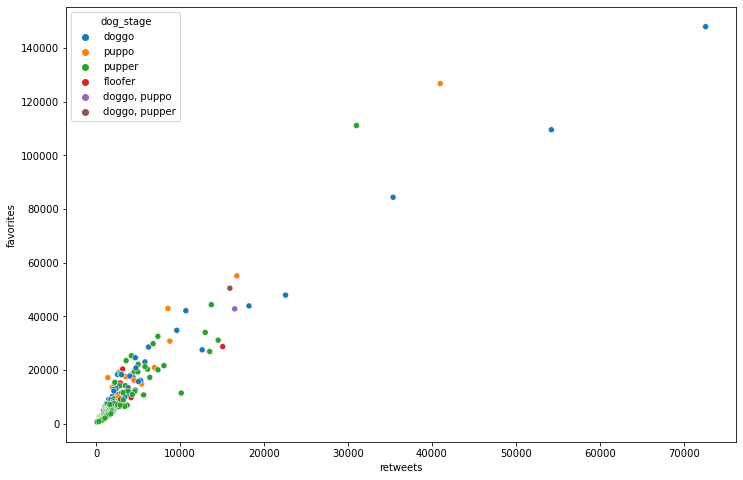

In [72]:
plt.figure(figsize=(12,8)) 

sns.scatterplot(x='retweets',y='favorites', data=df, hue='dog_stage')

<AxesSubplot:>

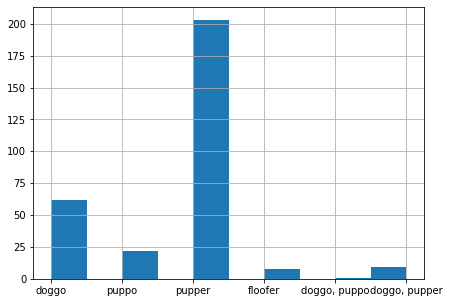

In [73]:
plt.figure(figsize=(7,5)) 
df['dog_stage'].hist()

<AxesSubplot:ylabel='dog_stage'>

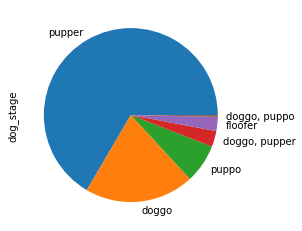

In [74]:
df['dog_stage'].value_counts().plot(kind='pie',figsize=(4,4))

<AxesSubplot:ylabel='prediction'>

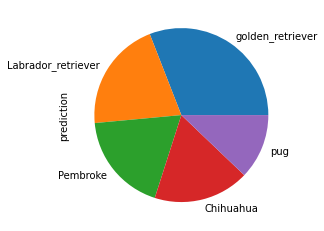

In [75]:
df['prediction'].value_counts()[:5].plot(kind='pie',figsize=(4,4))

<AxesSubplot:ylabel='name'>

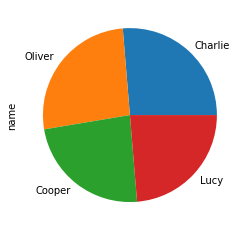

In [76]:
df['name'].value_counts()[1:5].plot(kind='pie',figsize=(4,4))

<AxesSubplot:>

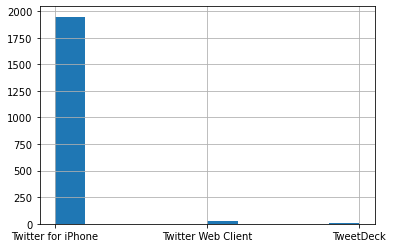

In [77]:
df['source'].hist()

### Insights:

1. Pupper is the most frequent dog breed in this dataset which yiu see clearly in the above scatterplot. 

2. Most confident predictions for neural network are golden_retriever and Labrador_retriever

3. The relationship between retweets and favorite is highly correlated from the above scatterplot diagram, which is expected when it is favourite among the people it will be more retweeted. 

4. The most common platform us twitter for iphone 

5. The most common dog names among them Charlie, oliver, copper and Lucy
